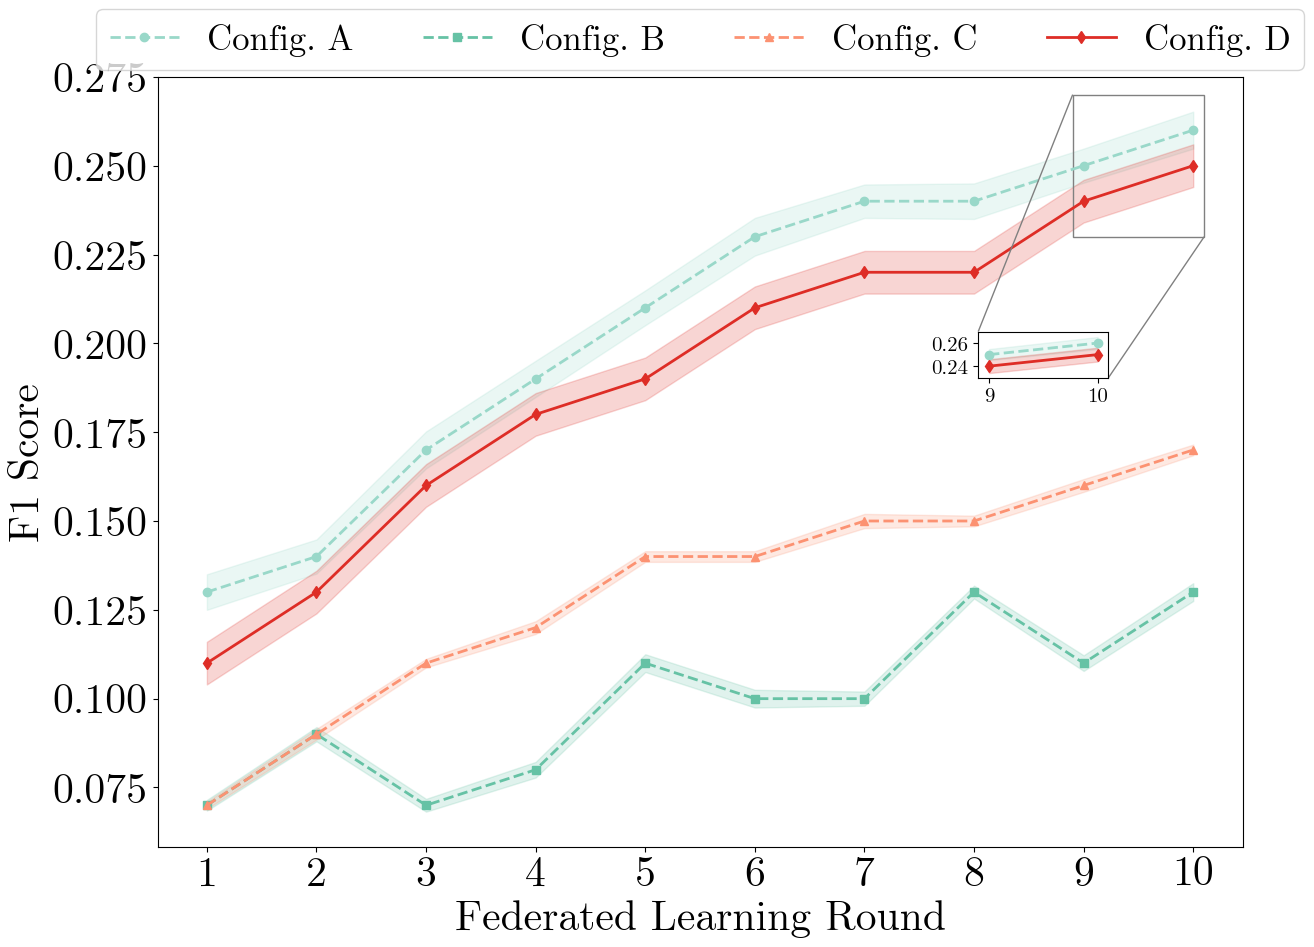

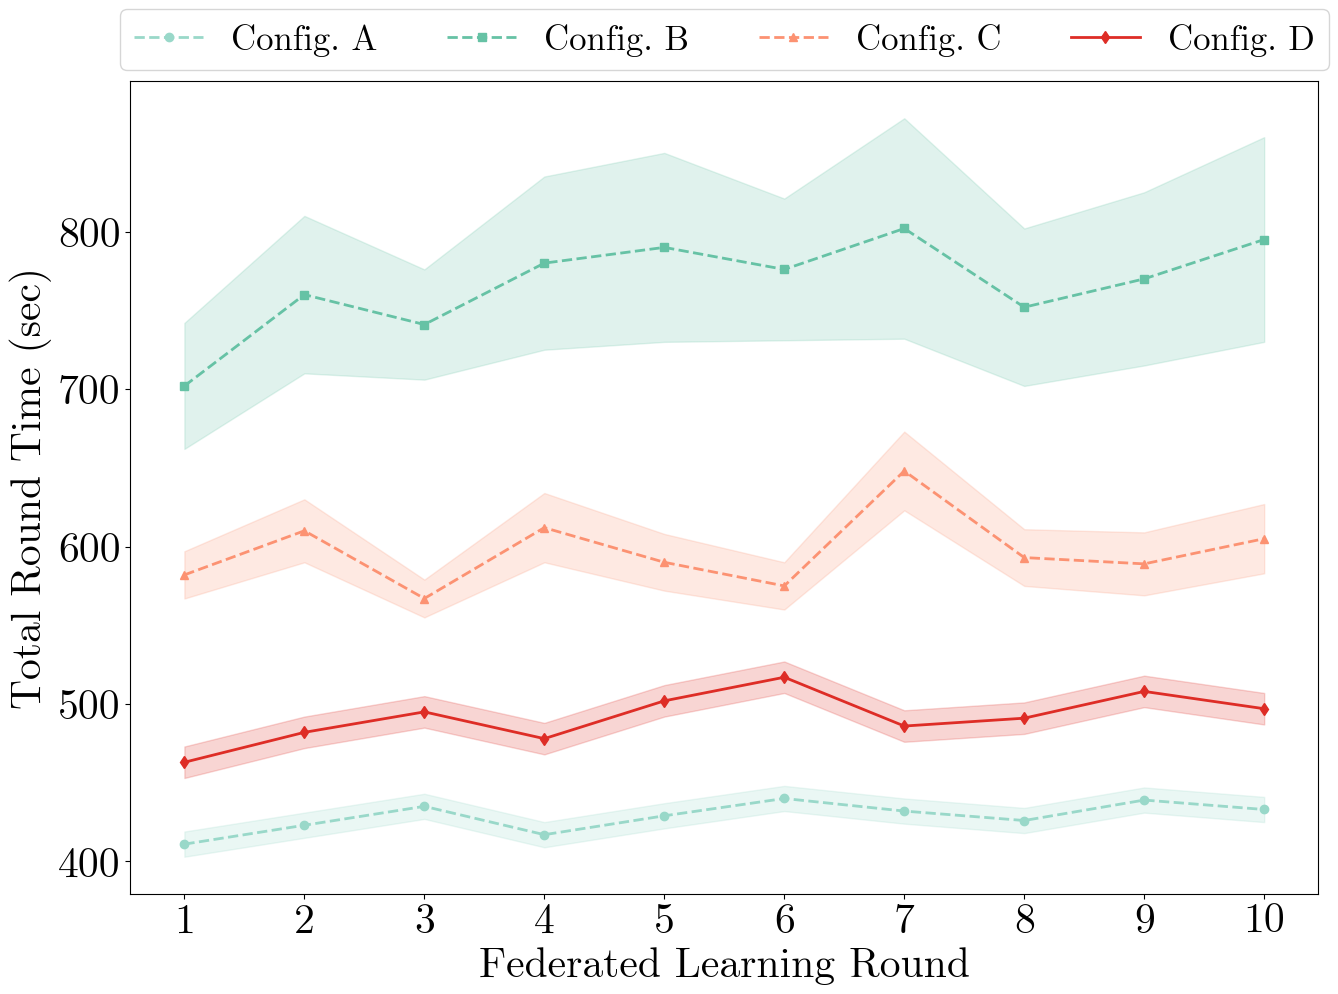

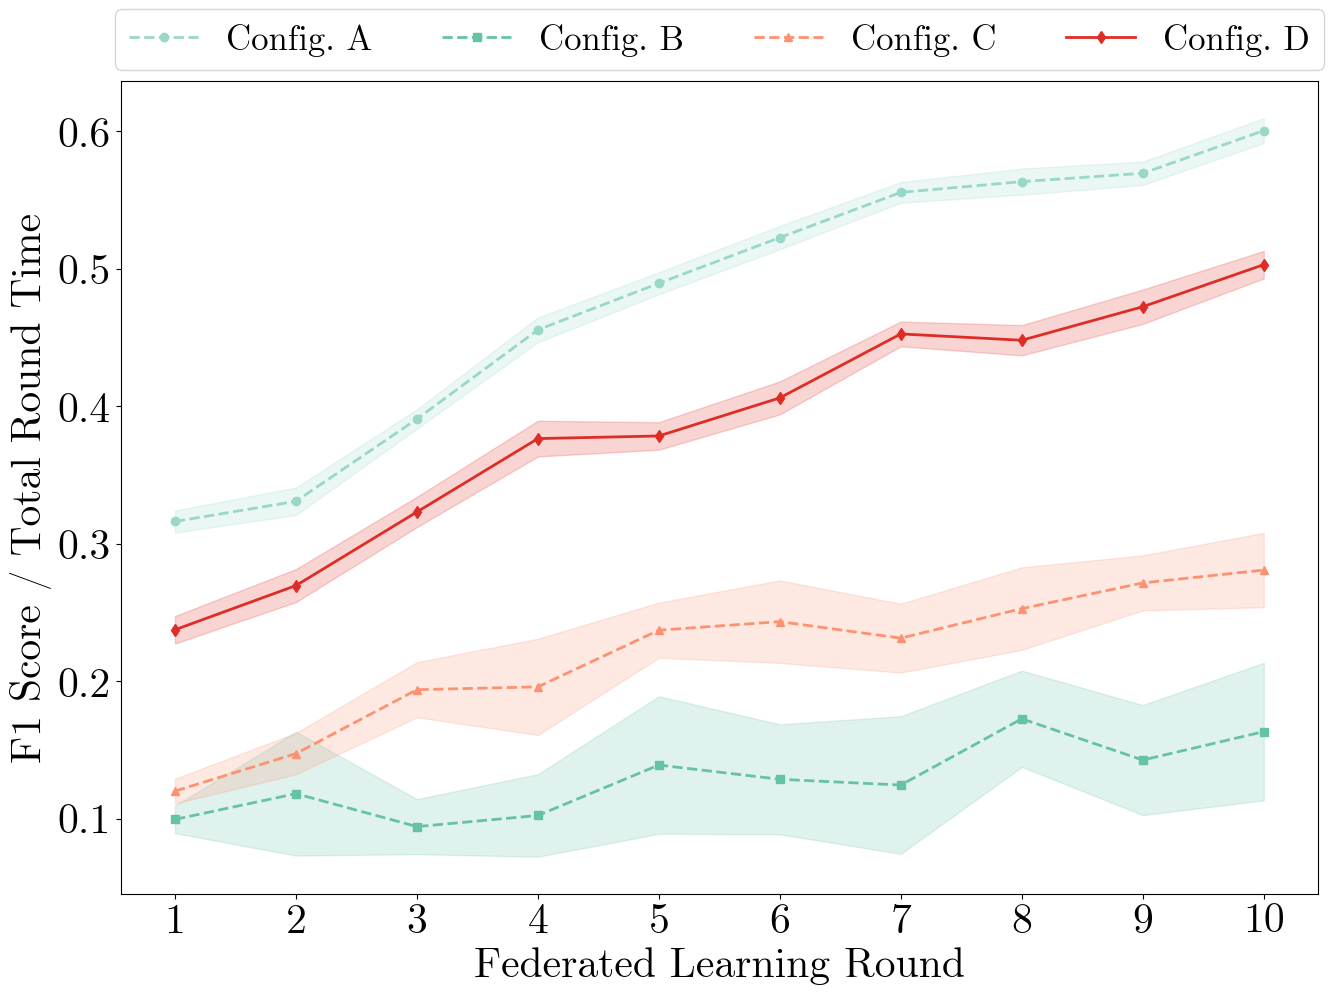

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Define the rounds
rounds = np.arange(1, 11)
plt.rcParams['font.family'] = 'CMU Serif'

# Randomly generated accuracy data
accuracy_A = [0.13, 0.14, 0.17, 0.19, 0.21, 0.23, 0.24, 0.24, 0.25, 0.26]
accuracy_B = [0.07, 0.09, 0.07, 0.08, 0.11, 0.1, 0.1, 0.13, 0.11, 0.13]
accuracy_C = [0.07, 0.09, 0.11, 0.12, 0.14, 0.14, 0.15, 0.15, 0.16, 0.17]
accuracy_D = [0.11, 0.13, 0.16, 0.18, 0.19, 0.21, 0.22, 0.22, 0.24, 0.25]

# Randomly generated total round time data
total_round_time_A = [411, 423, 435, 417, 429, 440, 432, 426, 439, 433]
total_round_time_B = [702, 760, 741, 780, 790, 776, 802, 752, 770, 795]
total_round_time_C = [582, 610, 567, 612, 590, 575, 648, 593, 589, 605]
total_round_time_D = [463, 482, 495, 478, 502, 517, 486, 491, 508, 497]

# Calculate Accuracy over Total Round Time and multiply by 1000
accuracy_over_time_A = [1000 * (a / t) for a, t in zip(accuracy_A, total_round_time_A)]
accuracy_over_time_B = [1000 * (a / t) for a, t in zip(accuracy_B, total_round_time_B)]
accuracy_over_time_C = [1000 * (a / t) for a, t in zip(accuracy_C, total_round_time_C)]
accuracy_over_time_D = [1000 * (a / t) for a, t in zip(accuracy_D, total_round_time_D)]

# Colors and styles
colors = ['#99d8c9', '#66c2a5', '#fc9272', '#de2d26']
labels = ['Config. A', 'Config. B', 'Config. C', 'Config. D']
markers = ['o', 's', '^', 'd']

### First Plot: F1 Score with Confidence Intervals and Improved Zoom ###
fig1, ax1 = plt.subplots(figsize=(14, 10))

# Define confidence intervals
ci_A = [0.005, 0.0048, 0.0052, 0.0051, 0.0049, 0.0053, 0.0047, 0.005, 0.0048, 0.0052]
ci_B = [0.0015, 0.002, 0.0018, 0.0022, 0.0025, 0.0025, 0.002, 0.0018, 0.0022, 0.0025]
ci_C = [0.001, 0.0015, 0.0012, 0.0018, 0.0015, 0.0015, 0.002, 0.0015, 0.0018, 0.0015]
ci_D = [0.006] * len(accuracy_D)

# Plot the curves with confidence intervals
for i, (data, label, color, marker, ci) in enumerate(zip(
    [accuracy_A, accuracy_B, accuracy_C, accuracy_D],
    labels, colors, markers, [ci_A, ci_B, ci_C, ci_D]
)):
    linestyle = '-' if label == 'Config. D' else '--'
    ax1.plot(rounds, data, color=color, label=label, marker=marker, linewidth=2, linestyle=linestyle)
    ax1.fill_between(rounds, 
                     [d - c for d, c in zip(data, ci)], 
                     [d + c for d, c in zip(data, ci)], 
                     color=color, alpha=0.2)

# Zoomed-in inset
axins = inset_axes(ax1, width="30%", height="20%", loc="lower left", bbox_to_anchor=(0.75, 0.6, 0.4, 0.3), bbox_transform=ax1.transAxes)

# Focus on last round for Config A and D
axins.plot(rounds[-2:], accuracy_A[-2:], color=colors[0], marker=markers[0], label="Config. A", linestyle='--', linewidth=2)
axins.plot(rounds[-2:], accuracy_D[-2:], color=colors[3], marker=markers[3], label="Config. D", linestyle='-', linewidth=2)
axins.fill_between(rounds[-2:], 
                   [a - c for a, c in zip(accuracy_A[-2:], ci_A[-2:])], 
                   [a + c for a, c in zip(accuracy_A[-2:], ci_A[-2:])], 
                   color=colors[0], alpha=0.2)
axins.fill_between(rounds[-2:], 
                   [d - c for d, c in zip(accuracy_D[-2:], ci_D[-2:])], 
                   [d + c for d, c in zip(accuracy_D[-2:], ci_D[-2:])], 
                   color=colors[3], alpha=0.2)

# Adjust zoom limits
axins.set_xlim(rounds[-2] - 0.1, rounds[-1] + 0.1)
axins.set_ylim(0.23, 0.27)
axins.tick_params(labelsize=15)

# Mark the inset region
mark_inset(ax1, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=1)

# Main plot settings
ax1.set_xlabel('Federated Learning Round', fontsize=30)
ax1.set_ylabel('F1 Score', fontsize=30)
ax1.tick_params(axis='both', labelsize=30)
ax1.set_xticks(rounds)
ax1.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=4)
plt.savefig('HDH1.pdf', bbox_inches='tight')
plt.show()

### Second Plot: Total Round Time with Confidence Intervals ###
fig2, ax2 = plt.subplots(figsize=(14, 10))

# Define confidence intervals for total round time
ci_A = [8] * len(total_round_time_A)
ci_B = [40, 50, 35, 55, 60, 45, 70, 50, 55, 65]
ci_C = [15, 20, 12, 22, 18, 15, 25, 18, 20, 22]
ci_D = [10] * len(total_round_time_D)

# Plot the curves with confidence intervals
for i, (data, label, color, marker, ci) in enumerate(zip(
    [total_round_time_A, total_round_time_B, total_round_time_C, total_round_time_D],
    labels, colors, markers, [ci_A, ci_B, ci_C, ci_D]
)):
    linestyle = '-' if label == 'Config. D' else '--'
    ax2.plot(rounds, data, color=color, label=label, marker=marker, linewidth=2, linestyle=linestyle)
    ax2.fill_between(rounds, 
                     [d - c for d, c in zip(data, ci)], 
                     [d + c for d, c in zip(data, ci)], 
                     color=color, alpha=0.2)

ax2.set_xlabel('Federated Learning Round', fontsize=30)
ax2.set_ylabel('Total Round Time (sec)', fontsize=30)
ax2.tick_params(axis='both', labelsize=30)
ax2.set_xticks(rounds)
ax2.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=4)

plt.tight_layout()
plt.savefig('HDH2.pdf', bbox_inches='tight')
plt.show()

### Third Plot: F1 Score / Total Round Time with Confidence Intervals ###
fig3, ax3 = plt.subplots(figsize=(14, 10))

# Define confidence intervals for accuracy over time
ci_A = [0.008, 0.01, 0.007, 0.009, 0.008, 0.0085, 0.0075, 0.0095, 0.0085, 0.009]
ci_B = [0.01, 0.045, 0.02, 0.03, 0.05, 0.04, 0.05, 0.035, 0.04, 0.05]
ci_C = [0.009, 0.015, 0.02, 0.035, 0.02, 0.03, 0.025, 0.03, 0.02, 0.027]
ci_D = [0.01, 0.012, 0.011, 0.013, 0.01, 0.012, 0.009, 0.011, 0.0125, 0.01]

# Plot the curves with confidence intervals
for i, (data, label, color, marker, ci) in enumerate(zip(
    [accuracy_over_time_A, accuracy_over_time_B, accuracy_over_time_C, accuracy_over_time_D],
    labels, colors, markers, [ci_A, ci_B, ci_C, ci_D]
)):
    linestyle = '-' if label == 'Config. D' else '--'
    ax3.plot(rounds, data, color=color, label=label, marker=marker, linewidth=2, linestyle=linestyle)
    ax3.fill_between(rounds, 
                     [d - c for d, c in zip(data, ci)], 
                     [d + c for d, c in zip(data, ci)], 
                     color=color, alpha=0.2)

ax3.set_xlabel('Federated Learning Round', fontsize=30)
ax3.set_ylabel('F1 Score / Total Round Time', fontsize=30)
ax3.tick_params(axis='both', labelsize=30)
ax3.set_xticks(rounds)
ax3.legend(fontsize=25, loc='upper center', bbox_to_anchor=(0.5, 1.11), ncol=4)

plt.tight_layout()
plt.savefig('HDH3.pdf', bbox_inches='tight')
plt.show()